In [23]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

# %matplotlib inline

In [53]:
def read_file(filename):

    points = list()
    
    with open(filename, 'r') as f:
        for line in f:
            line = line.split()
            x, y, z = float(line[0]), float(line[1]), float(line[2])
            points.append([x, y, z])
    
    return np.array(points)

In [54]:
points = read_file('data/teapot.txt')

In [69]:
C = [0, 0, 5]

<IPython.core.display.Javascript object>


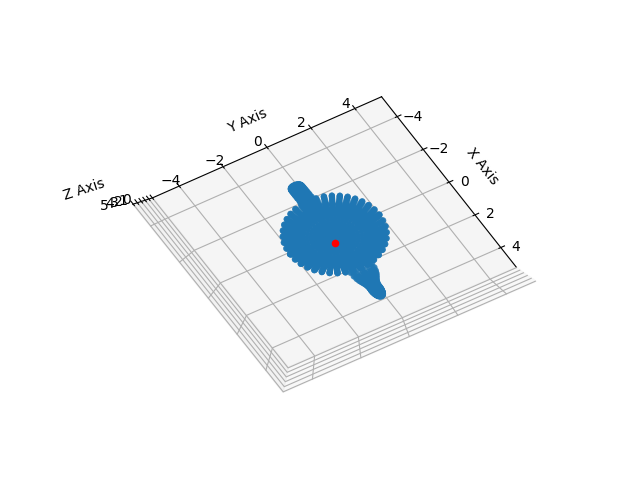

In [70]:
%matplotlib notebook

# fig = plt.figure(figsize = plt.figaspect(0.5))

ax = plt.axes(projection='3d')

ax.set_xlim([-5, 5])
ax.set_ylim([-5, 5])
ax.set_zlim([0, 5])

ax.scatter(points[:,0], points[:,1], points[:,2], linewidth=0)
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')
ax.scatter(C[0], C[1], C[2], c='red')
   
plt.show()

### Convex hull 3d

In [71]:
from scipy.spatial import ConvexHull

def convex_hull(points):

    points = np.append(points, [[0,0,0]], axis = 0) # All points plus origin
    hull = ConvexHull(points) # Visible points plus possible origin. Use its vertices property.

    return hull

### Hidden points removal

In [72]:
def hidden_points_removal(points, C, param=np.pi):
    
    n = len(points)
    
    points = points - np.repeat([C], n, axis=0)
    normp = np.linalg.norm(points, axis = 1)
    R = np.repeat(max(normp) * np.power(10.0, param), n, axis = 0)

    P_ = 2 * np.multiply(np.repeat((R - normp).reshape(n, 1), len(points[0]), axis = 1), points) 
    P = np.divide(P_, np.repeat(normp.reshape(n, 1), len(points[0]), axis = 1))
    P += points 
    
    return P

<IPython.core.display.Javascript object>


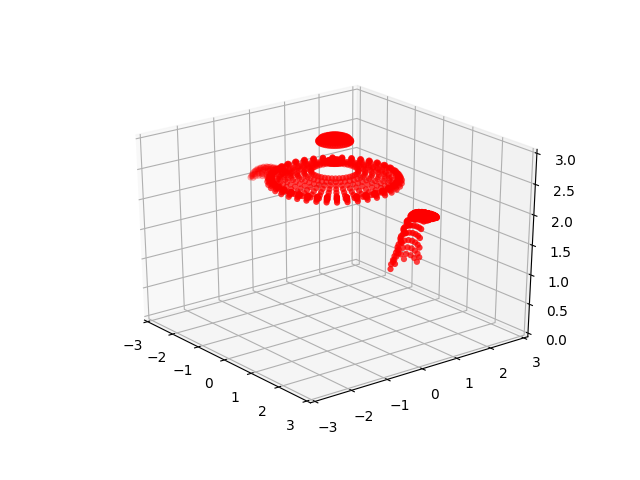

In [75]:
hpr = hidden_points_removal(points, C, np.pi/2)
hull = convex_hull(hpr)

# fig = plt.figure(figsize = plt.figaspect(0.5))

%matplotlib notebook

X_hpr = np.take(points[:,0], hull.vertices[:-1])
Y_hpr = np.take(points[:,1], hull.vertices[:-1])
Z_hpr = np.take(points[:,2], hull.vertices[:-1])
# %matplotlib notebook

ax = plt.axes(projection='3d')

ax.set_xlim([-3, 3])
ax.set_ylim([-3, 3])
ax.set_zlim([0, 3])

ax.scatter(X_hpr, Y_hpr, Z_hpr, c='red', linewidth=0)
plt.show()